<a href="https://colab.research.google.com/github/evliyaaa/DeepLearning-ProjectHub/blob/main/Pytorch_Deep_Learning_Intermediate_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Dataset
Time to refresh your PyTorch Datasets knowledge!

Before model training can commence, you need to load the data and pass it to the model in the right format. In PyTorch, this is handled by Datasets and DataLoaders. Let's start with building a PyTorch Dataset for our water potability data.

In [1]:
import pandas as pd
from torch.utils.data import Dataset

class WaterDataset(Dataset):
    def __init__(self, csv_path):
        super().__init__()
        # Load data to pandas DataFrame
        df = pd.read_csv(csv_path)
        # Convert data to a NumPy array and assign to self.data
        self.data = df.to_numpy()

    # Implement __len__ to return the number of data samples
    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        features = self.data[idx, :-1]
        # Assign last data column to label
        label = self.data[idx, -1]
        return features, label

In [2]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [3]:
from torch.utils.data import DataLoader, random_split

full_dataset = WaterDataset('water_potability.csv')

# Define the sizes of your training and testing sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Use random_split to create training and testing sets
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoader for testing set
dataloader_test = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [4]:
# Create a DataLoader based on dataset_train
dataloader_train = DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=True,
)

# Get a batch of features and labels
features, labels = next(iter(dataloader_train))
print(features, labels)

tensor([[0.6432, 0.6755, 0.1545, 0.7182, 0.5571, 0.3258, 0.6851, 0.7790, 0.2169],
        [0.4840, 0.3981, 0.3054, 0.3241, 0.6656, 0.7974, 0.6040, 0.2802, 0.6182]],
       dtype=torch.float64) tensor([0., 0.], dtype=torch.float64)


In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        # Pass x through linear layers adding activations
        x = x.to(self.fc1.weight.dtype)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        x = x.float()
        return x

# Optimizers

### Stochastic Gradient Descent
(SGD)optimizer = optim.SGD(net.parameters(), lr=0.01)
Update depends on learning rate
Simple and efficient, for basic models
Rarely used in practice

### Adaptive Gradient (Adagrad)
optimizer = optim.Adagrad(net.parameters(), lr=0.01)
Adapts learning rate for each parameter
Good for sparse data
May decrease the learning rate too fast

### Root Mean Square Propagation (RMSprop)
optimizer = optim.RMSprop(net.parameters(), lr=0.01)
Update for each parameter based on the size of its previous gradients

### Adaptive Moment Estimation (Adam)
optimizer = optim.Adam(net.parameters(), lr=0.01)
Arguably the most versatile and widely used
RMSprop + gradient momentum
Often used as the go-to optimizer





In [6]:
def train_model(optimizer, net, num_epochs):
    criterion = nn.BCELoss()
    for epoch in range(num_epochs):
        running_loss = 0.
        for features, labels in dataloader_train:
            optimizer.zero_grad()
            outputs = net(features)
            loss = criterion(outputs, labels.view(-1, 1).float())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    train_loss = running_loss / len(dataloader_train)
    print(f"Training loss after {num_epochs} epochs: {train_loss}")

#### Compare 3 Optimizers

In [7]:
import torch.optim as optim

net = Net()

# Define the SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

Training loss after 10 epochs: 0.6761233446313374


In [8]:
import torch.optim as optim

net = Net()

# Define the RMSprop optimizer
optimizer = optim.RMSprop(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

Training loss after 10 epochs: 0.6762345009182223


In [9]:
import torch.optim as optim

net = Net()

# Define the Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.0001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

Training loss after 10 epochs: 0.675055419775977


### Model Validation

In [12]:
!pip install torchmetrics
import torch
from torchmetrics import Accuracy

# Set up binary accuracy metric
acc = Accuracy(task='binary')

net.eval()
with torch.no_grad():
    for features, labels in dataloader_test:
        # Get predicted probabilities for test data batch
        outputs = net(features)
        preds = (outputs >= 0.5).float()
        acc(preds, labels.view(-1, 1))

# Compute total test accuracy
test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.6079404354095459


## He/Kaiming Initialisation with better resulting ELU avtivation Function

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

        # Apply He initialization
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity='sigmoid')

    def forward(self, x):
        # Update ReLU activation to ELU
        x = nn.functional.elu(self.fc1(x))
        x = nn.functional.elu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x

## Batch Normalization
As a final improvement to the model architecture, let's add the batch normalization layer after each of the two linear layers. The batch norm trick tends to accelerate training convergence and protects the model from vanishing and exploding gradients issues.

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        # Add two batch normalization layers
        self.bn1 = nn.BatchNorm1d(16)
        self.bn2 = nn.BatchNorm1d(8)

        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid")

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.functional.elu(x)

        # Pass x through the second set of layers
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.elu(x)

        x = nn.functional.sigmoid(self.fc3(x))
        return x

## Working with Image Dataset

In [15]:
from google.colab import files
uploaded = files.upload()

Saving clouds.zip to clouds.zip


In [119]:
import zipfile
import io

zip_file_path = 'clouds.zip'

# Extract the zip file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_path]), 'r') as zip_ref:
    zip_ref.extractall('/content/clouds_train')


## Data Autmentation

### Transformers

In [120]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

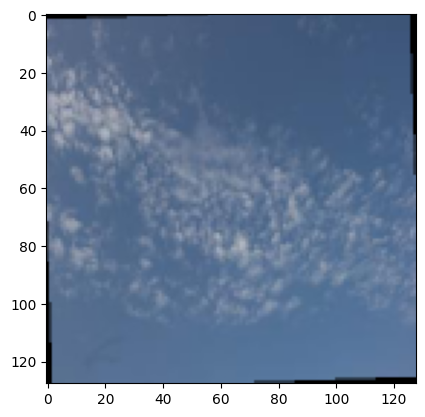

In [121]:
import matplotlib.pyplot as plt

train_transforms = transforms.Compose([
    # Add horizontal flip and rotation
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
    "/content/clouds_train/clouds/clouds_train",
    transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=1
)

image, label = next(iter(dataloader_train))
# Reshape the image tensor
image = image.squeeze().permute(1, 2, 0)
# Display the image
plt.imshow(image)
plt.show()

In [133]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        # Calculate the input size for the linear layer dynamically
        self.feature_size = self._get_feature_size((3, 128, 128))
        # Define classifier
        self.classifier = nn.Linear(self.feature_size, num_classes)

    def _get_feature_size(self, shape):
        x = torch.rand(1, *shape)
        x = self.feature_extractor(x)
        return x.numel()

    def forward(self, x):
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x


## Transformers and Model Training

In [134]:
# Define transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
    "/content/clouds_train/clouds/clouds_train",
    transform=train_transforms,)

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

In [135]:
# Define the model
net = Net(num_classes=7)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 3.2413
Epoch 2, Loss: 1.6968
Epoch 3, Loss: 1.4078


### Model Evatuation

In [149]:
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),  # Adjusted to match training dimensions
])

dataset_test = ImageFolder("/content/clouds_train/clouds/clouds_test", transform=test_transforms)

dataloader_test = DataLoader(
    dataset_test, shuffle=True, batch_size=16
)

# Rest of the code remains the same


In [150]:
# Define metrics
from torchmetrics import Precision
from torchmetrics import Recall

metric_precision = Precision(task='multiclass', num_classes=7, average='macro')
metric_recall = Recall(task='multiclass', num_classes=7, average='macro')
net = Net(num_classes=7)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

RuntimeError: ignored

In [ ]:
# Define precision metric
metric_precision = Precision(
    task="multiclass", num_classes=7, average=None
)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
precision = metric_precision.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v
    in dataset_test.class_to_idx.items()
}
print(precision_per_class)